In [24]:
#Importing required packages
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import seaborn as sns
from dmba import plotDecisionTree, classificationSummary, regressionSummary

In [3]:
disease_df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
disease_df.columns

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

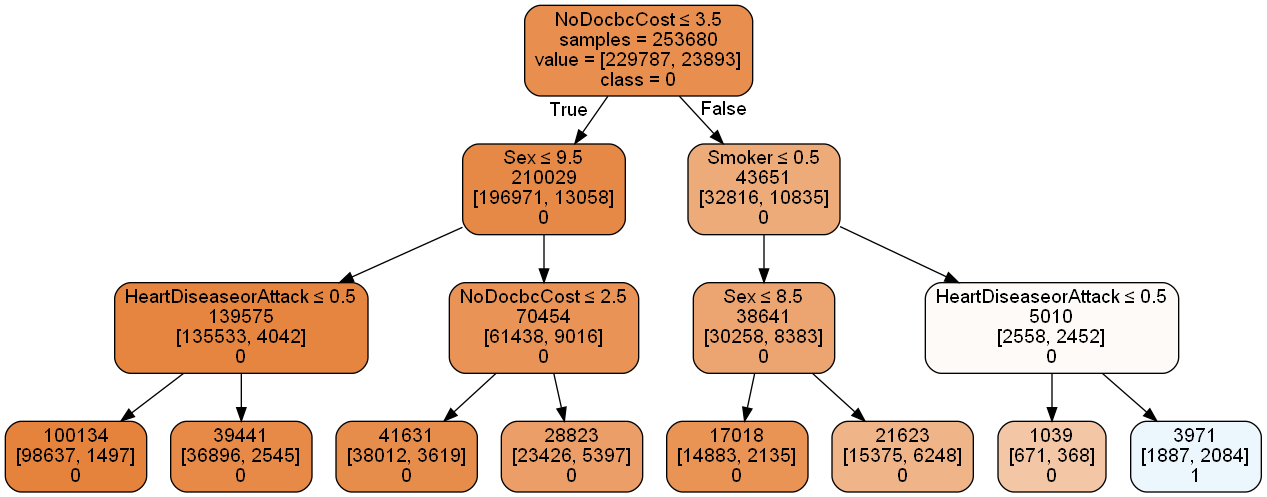

In [26]:
disease_df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

classTree = DecisionTreeClassifier(random_state=0, max_depth=3)

X = disease_df.drop(columns = ['HeartDiseaseorAttack'])
y = disease_df['HeartDiseaseorAttack']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

classTree.fit(X, y)



plotDecisionTree(classTree, feature_names = disease_df.columns[0:21], class_names=classTree.classes_)



#feature_names=x.columns,
              #  class_names=classTree.classes_)

#print("Classes: , {}".format(', '.join(classTree.classes_)))
#.drop(columns=['HeartDiseaseorAttack']), disease_df['HeartDiseaseorAttack'])
#names=disease_df.columns[:-1],

#columns[0:21]

<AxesSubplot:>

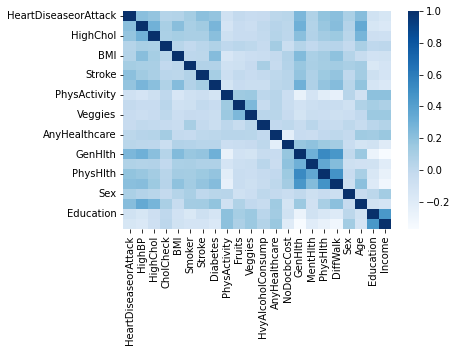

In [28]:
plt.figure(figsize=(6,4))
sns.heatmap(disease_df.corr(),cmap='Blues',annot=False)

<AxesSubplot:>

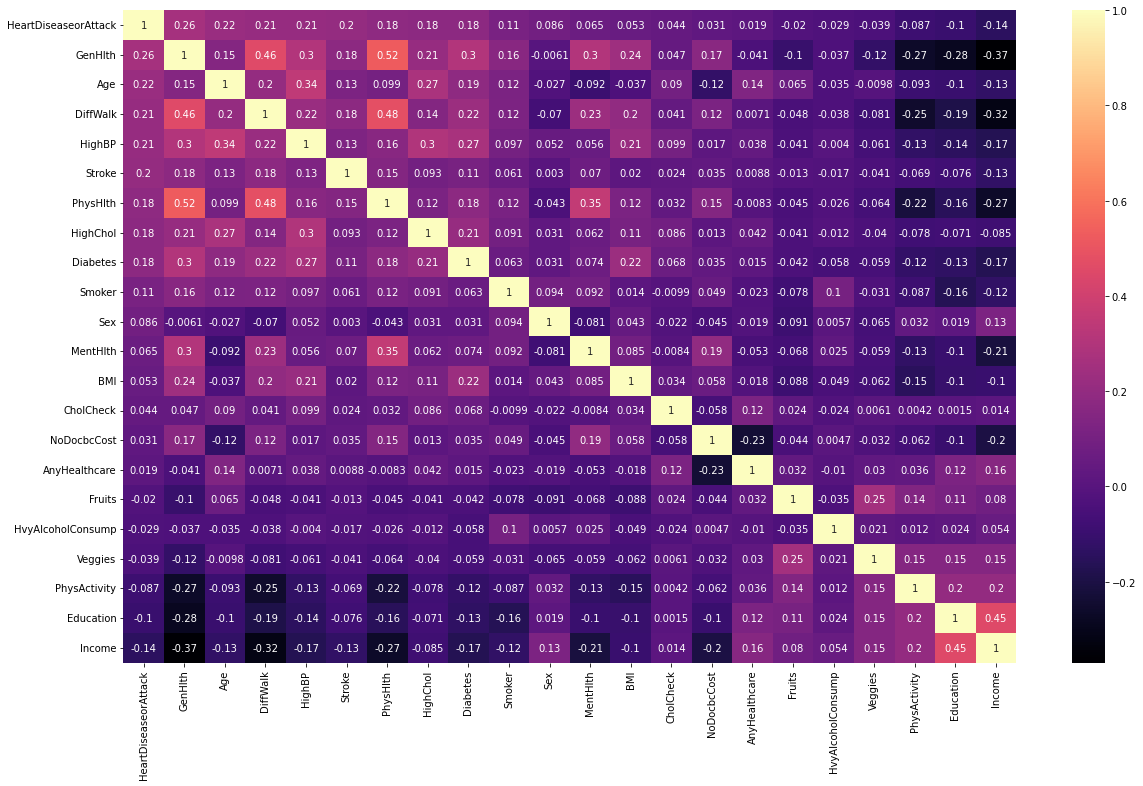

In [33]:
#Quality correlation matrix
k = 22 #number of variables for heatmap
cols = disease_df.corr().nlargest(k, 'HeartDiseaseorAttack')['HeartDiseaseorAttack'].index
cm = disease_df[cols].corr()
plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True, cmap = 'magma')

C:\Users\evely\AppData\Local\Temp/ipykernel_69068/3514672186.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
C:\Users\evely\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\evely\AppData\Local\Temp/ipykernel_69068/3514672186.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
C:\Users\evely\anaconda3\lib\site-packages\seaborn\distributions.py:2619: Fut

C:\Users\evely\AppData\Local\Temp/ipykernel_69068/3514672186.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
C:\Users\evely\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\evely\AppData\Local\Temp/ipykernel_69068/3514672186.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows + 1,number_of_columns,i+1)
C:\Users\evely\anaconda3\lib\site-packages\seaborn\distributions.py:2619: Fut

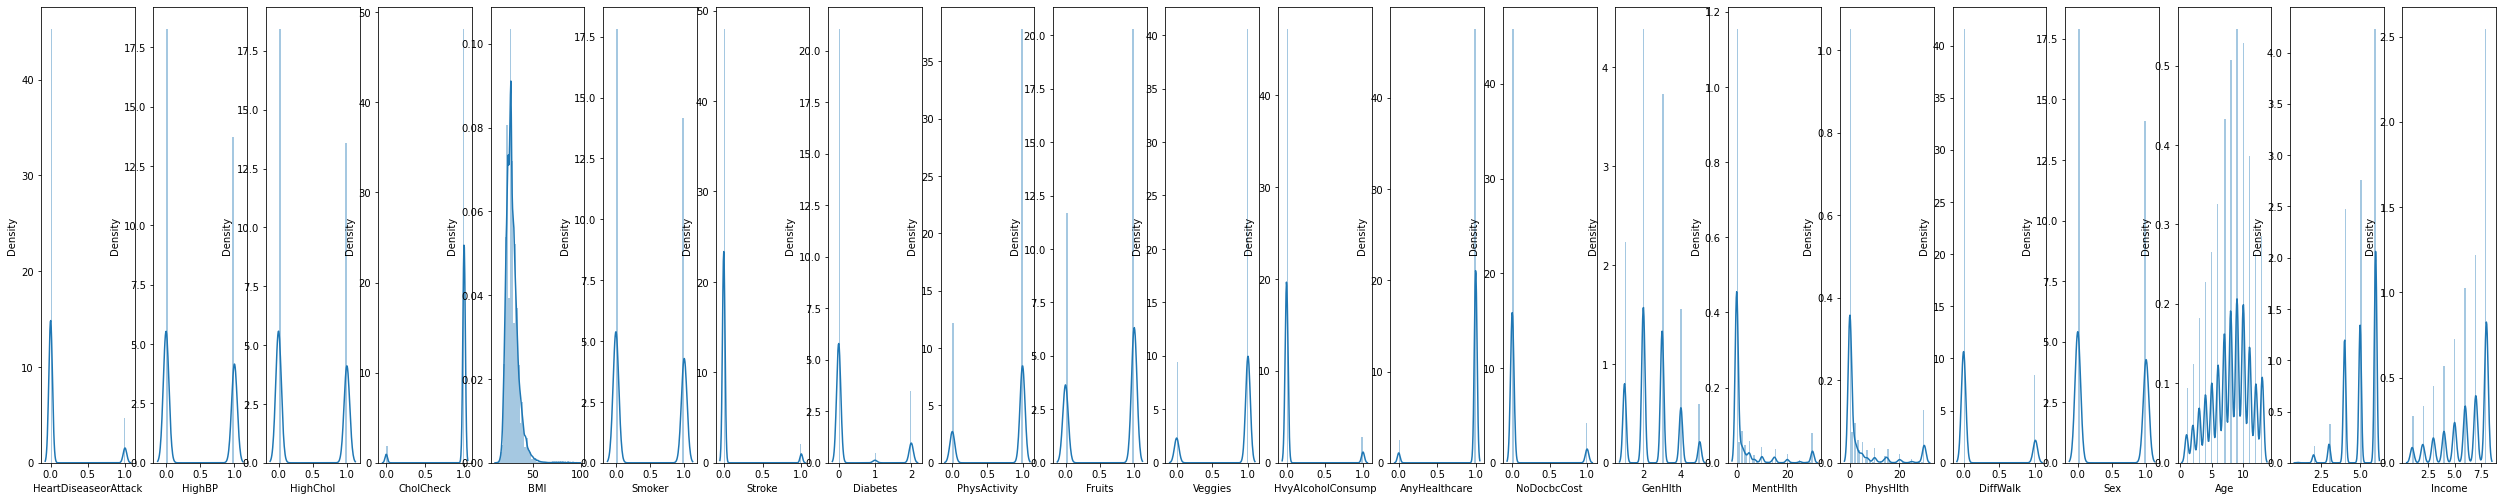

In [37]:
l = disease_df.columns.values
number_of_columns = 22
number_of_rows = len(l)-1/number_of_columns

plt.figure(figsize=(2*number_of_columns,10*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(disease_df[l[i]],kde=True) 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.0494806 to fit



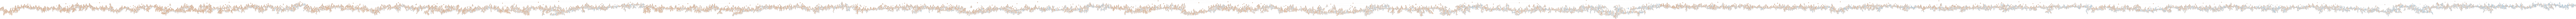

In [4]:
disease_df.drop(columns=['PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare'], inplace=True)

X = disease_df.drop(columns=['HeartDiseaseorAttack'])
y = disease_df['HeartDiseaseorAttack']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.4, random_state = 1)

fullClassTree = DecisionTreeClassifier(random_state = 1)
fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=train_X.columns)